<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Proyecto_Final_Coloma%2C_Orbe%2C_Posso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UDLA
#ISWZ3401-2626_2627-INTELIGENCIA ARTIFICIAL I


---


# Integrantes

* Kevin Coloma
* Fernando Orbe
* Martin Posso


---



## Instrucciones

> ### Proyecto final
> Proyecto de término de curso (Máximo 3 integrantes)

> Realice lo especificado en el archivo adjunto

> * Elija un dataset del repositorio Kaggle y aplique técnicas de análisis de datos y aprendizaje automático.

> * Entienda el problema (de negocio) al que los datos hacen referencia. En el repositorio Kaggle encontrará bibliografía (artículos y kernels) asociada a cada dataset.

> **Descripción de los datos:** trate con datos faltantes, datos atípicos, transformación de los datos ejemplos: nominal a ordinal, normalización/estandarización, datos desbalanceados, etc.-

> * En el problema utilice tecnica/algoritmo de machine learning para realizar minería sobre el conjunto de datos y extraer patrones/información relevante (Redes neuronales, árboles de decisión, algoritmos genéticos, etc). NOTA: separe la base en 80/20, 80% de los datos para entrenar y 20% para testear

> De las conclusiones relevantes al proyecto, referentes a cual modelo fue mejor en función de los resultados dados con los ejemplos de test. Recuerde que en las redes neuronales podemos cambiar la velociodad de aprendizaje, topología de la red (pruebe modificando varios parámetros)

---

El proyecto puede se realizado en Python usando las librerías como por ejemplo Pandas, Seaborn, Sk-learn u otras. Puede utilizar la librería sklearn para árboles de decisión y redes neuronales.

---

### Formato de Entrega

> * Entregar un infome dónde se detalle cada una de las fases realizadas
> * Entregar los fuentes del programa
> * Entregar un pdf indicando los pasos para ejecutar el programa
> * Subir al drive por lo menos 3 fotos dónde se vea a todos los integrantes del grupo y el programa:
>> https://udlaec-my.sharepoint.com/:f:/g/personal/bernarda_sandoval_udla_edu_ec/Ej21KAD6G4ZLskPzMP56SiABxtWnYRQrMwDRzAop28-z2A?e=pDDYFQ

Subir el video a youtube con la solución al problema y los conclusiones

### Links de interés

> * https://deepnote.com/project/artificialintelligence2-iuKMYH-ORBu772oV9dxvWg/%2Fai_202120%2Fclassification_problems.ipynb

> * https://stackabuse.com/introduction-to-neural-networks-with-scikit-learn

> * https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html

# CODIGO

## Librerias

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import plot_tree

#Modelos
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Standarizar datos
from sklearn.preprocessing import StandardScaler

#train split para obtener explicativas y objetivo
from sklearn.model_selection import train_test_split

#Metricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, RocCurveDisplay, roc_auc_score, roc_curve

#k-fold Cross Validation
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Data Selection

### Analisis

In [ ]:
df = pd.read_csv('/content/sample_data/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#### El tipo de datos que se encuentran presentes en nuestro dataset

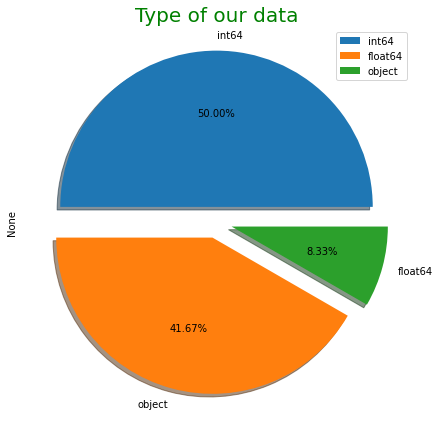

In [ ]:
plt.figure(figsize=(7, 10))
plt.title('Type of our data',color='green', fontsize=20)
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.legend(labels=['int64','float64','object'])

#### Obtencion de variables categoricas

In [ ]:
categorical = df.select_dtypes(include=['object']).columns
print(categorical)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


#### Obtencion de variables numericas

In [ ]:
numerical = df.select_dtypes(include=['int64','float64']).columns
print(numerical)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


#### Descripcion de la tabla segun no tienen una enfermedad en el corazon

In [ ]:
df[df['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Descripcion de la tabla segun tienen una enfermedad en el corazon

In [ ]:
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Correlacion con respecto a la variable que vamos a utilizar como output 'HeartDisease'

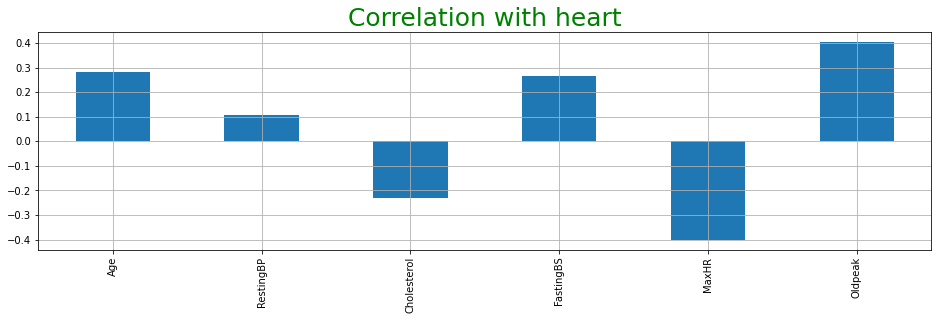

In [ ]:
#Correlation with Response Variable class
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X.corrwith(y).plot.bar(figsize=(16, 4), rot=90, grid=True)
plt.title('Correlation with heart', fontsize=25, color='Green')
plt.show()

#### Analisis de la correlacion

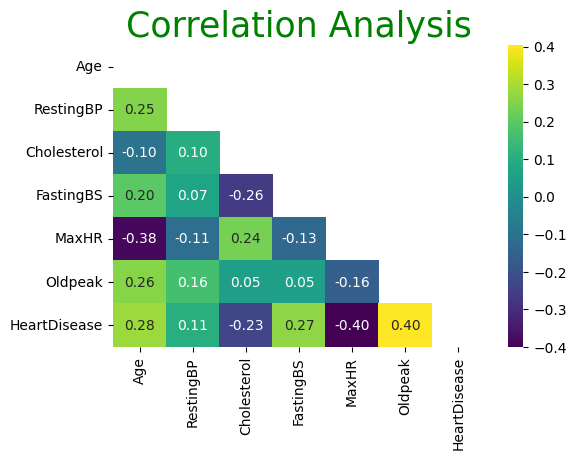

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis', fontsize=25, color='Green')
sns.heatmap(corr, mask=mask, annot=True, lw=0, linecolor='white', cmap='viridis', fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Contar variables categoricas

In [ ]:
for col in df[categorical]:
    print(df[categorical][col].value_counts())
    print("****"*10)

M    725
F    193
Name: Sex, dtype: int64
****************************************
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
****************************************
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
****************************************
N    547
Y    371
Name: ExerciseAngina, dtype: int64
****************************************
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
****************************************


In [ ]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

FastingBS    1.264484
Oldpeak      1.022872
dtype: float64

#### Calculamos la oblicuidad

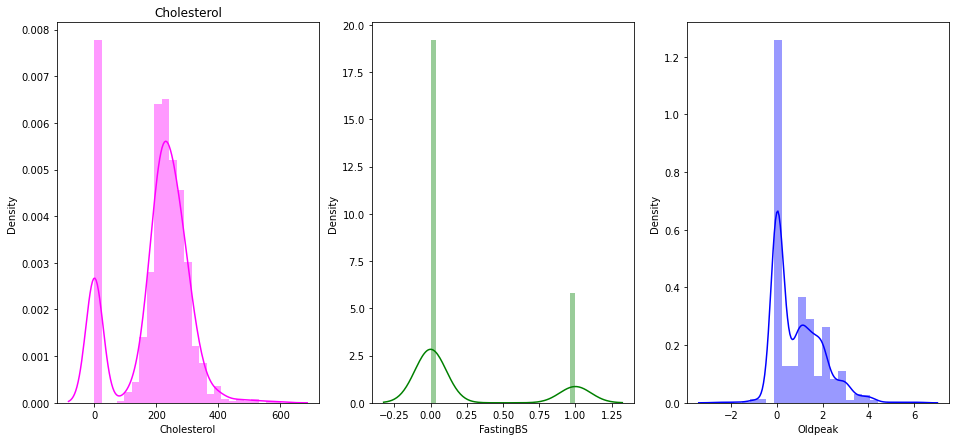

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(131)
sns.distplot(df["Cholesterol"],bins=25, color="magenta", label="Skewness : %.2f"%(df["Cholesterol"].skew()));
plt.title('Cholesterol')

plt.subplot(132)
sns.distplot(df["FastingBS"],bins=25, color="green", label="Skewness : %.2f"%(df["FastingBS"].skew()));

plt.subplot(133)
sns.distplot(df["Oldpeak"],bins=25, color="Blue", label="Skewness : %.2f"%(df["Oldpeak"].skew()));

#### Variables Importantes

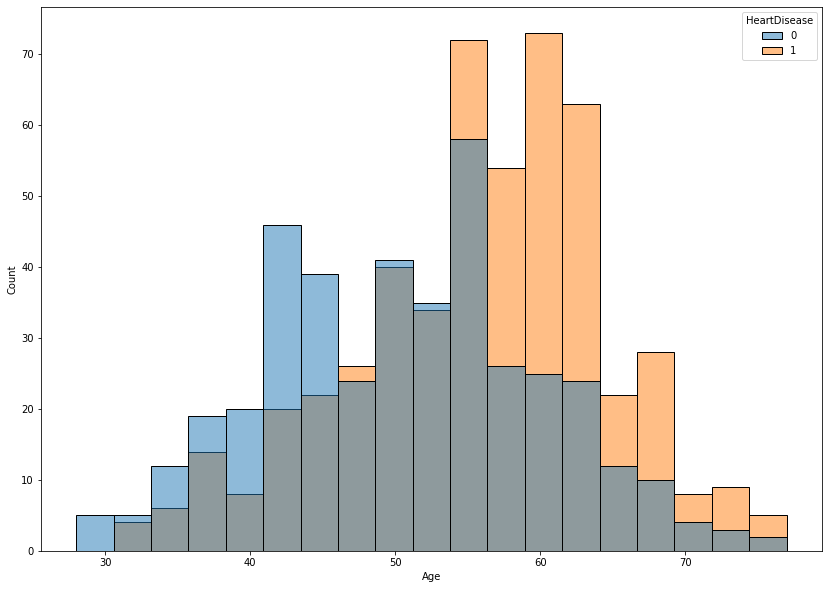

In [ ]:
plt.figure(figsize=(14, 10))
sns.histplot(x=df['Age'], hue=df['HeartDisease'])

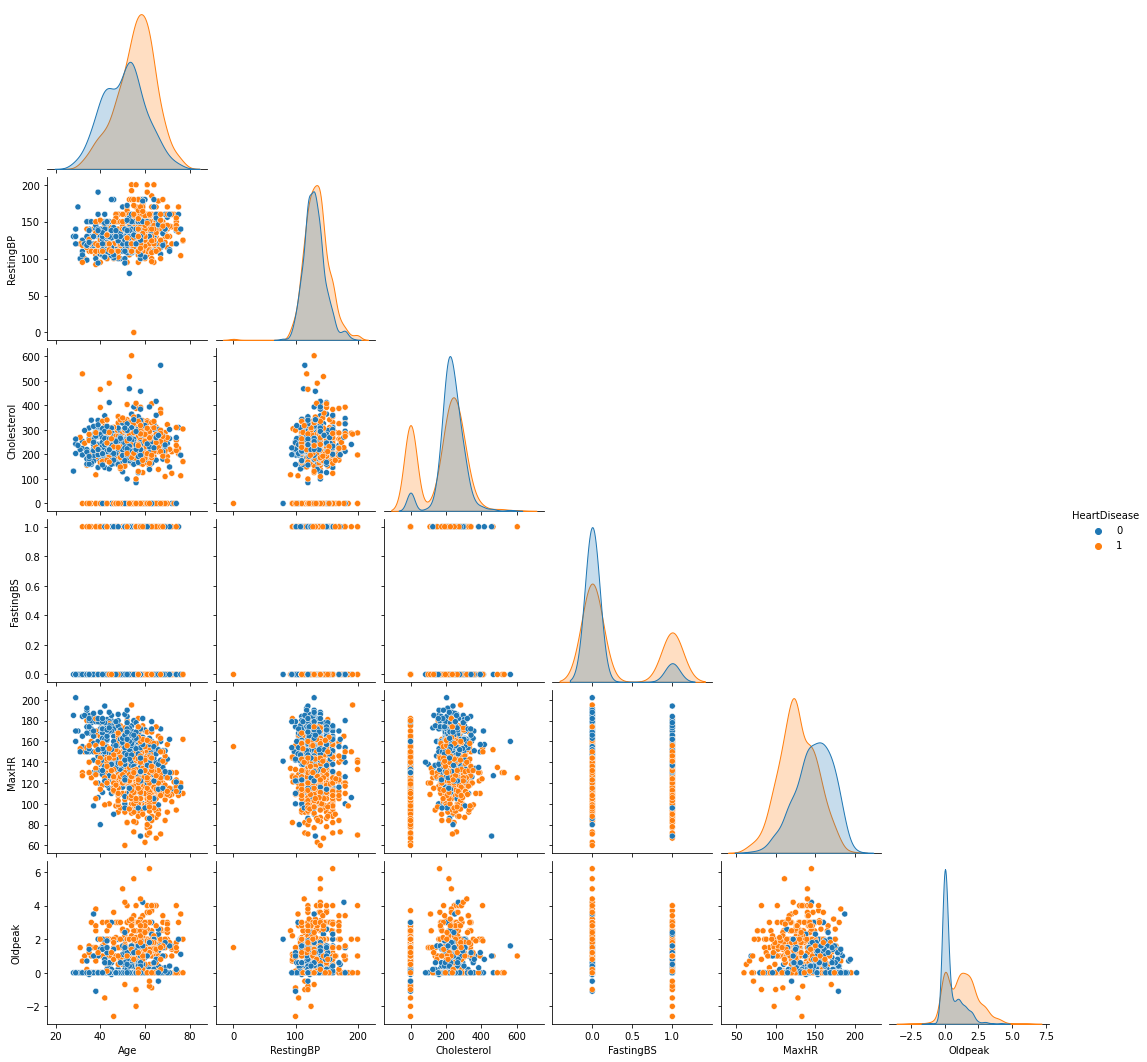

In [ ]:
sns.pairplot(df[:-1], hue='HeartDisease', corner=True)

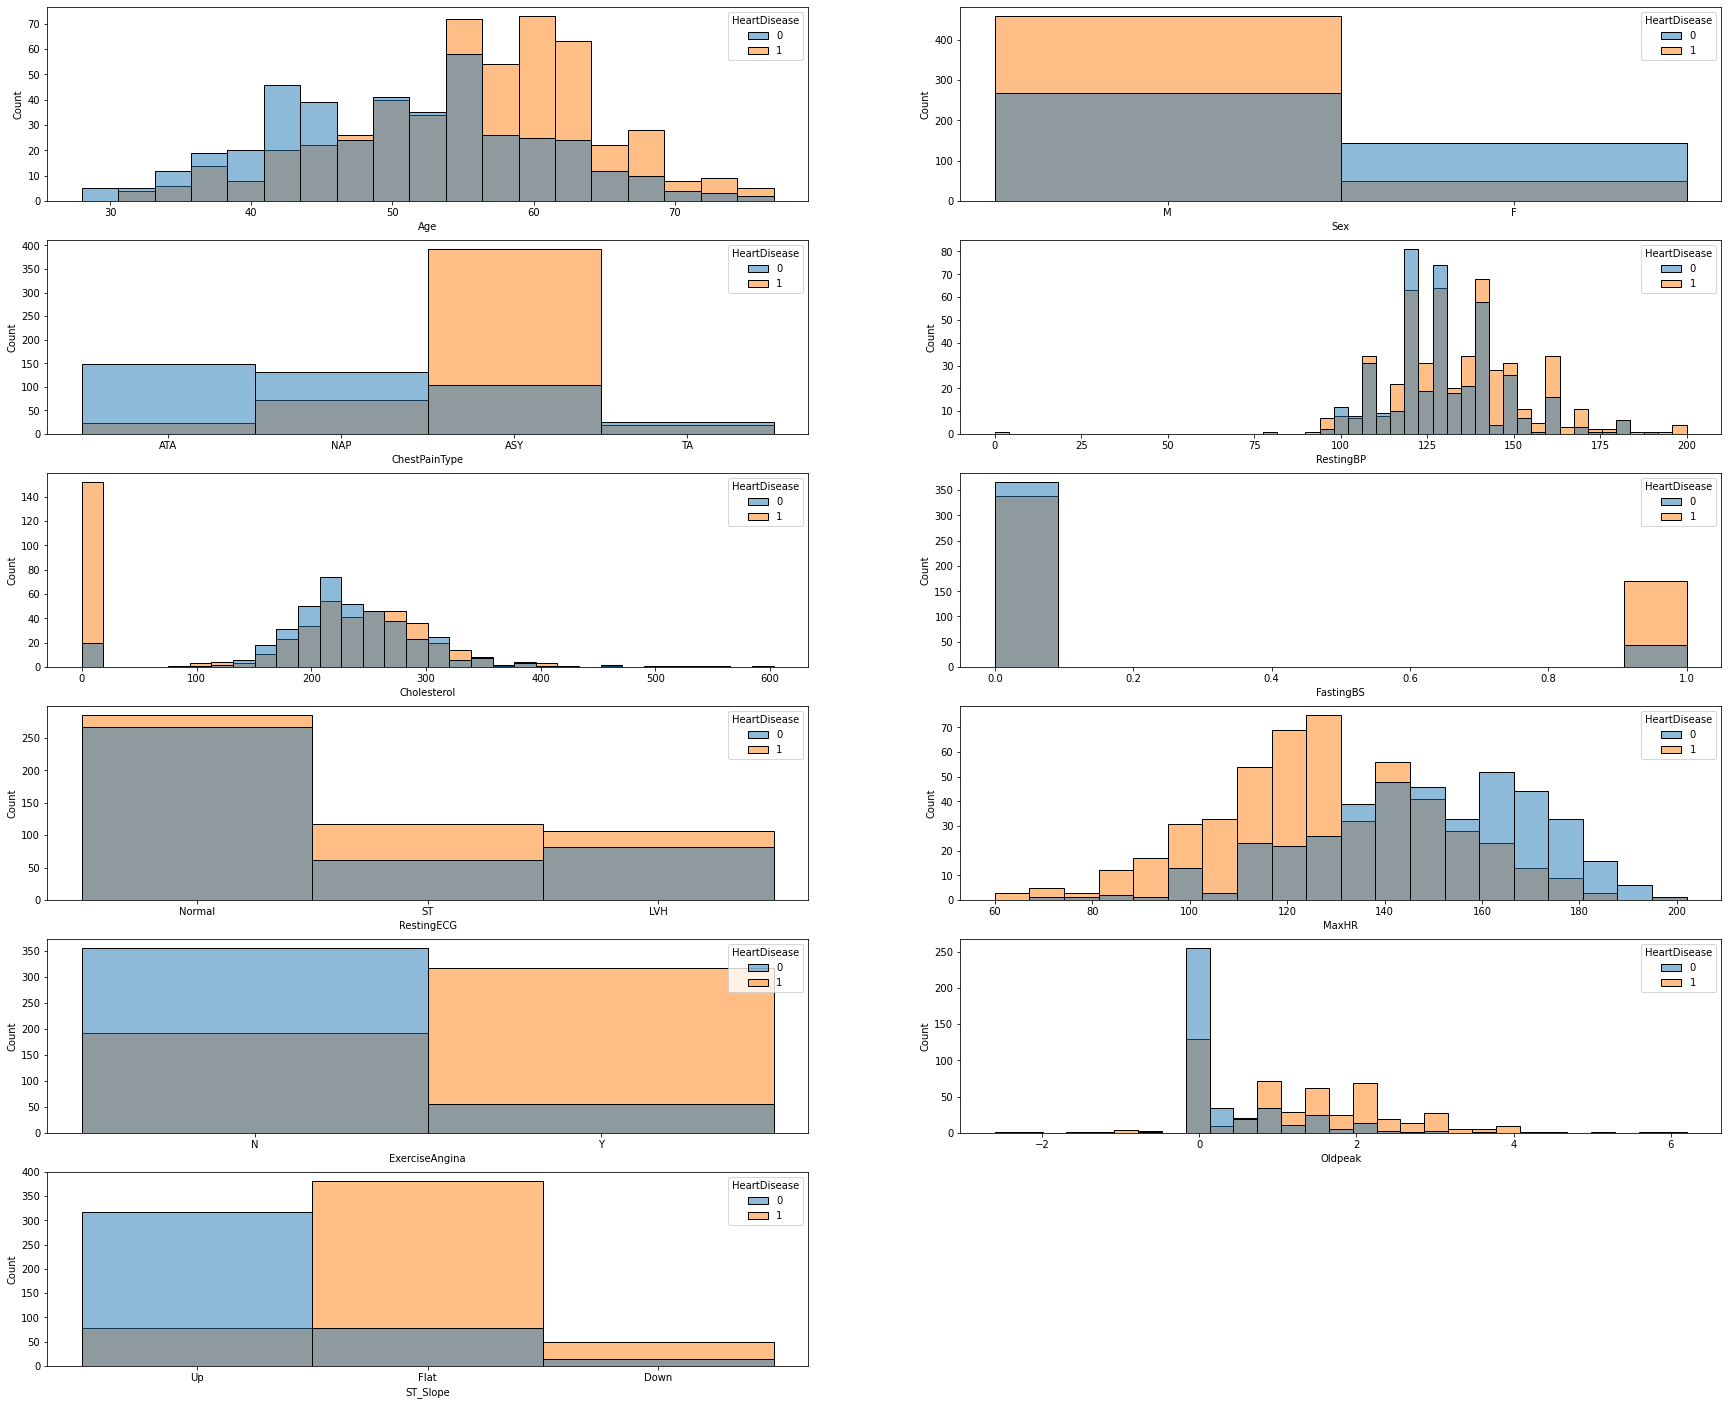

In [ ]:
variables = df.columns[:-1]

plt.figure(figsize=(30, 25))
i = 1

for v in variables:
  plt.subplot(6, 2, i)
  sns.histplot(x=df[v], hue=df['HeartDisease'])
  i += 1

Con respecto al analisis de los datos y su relacion para determinar si el paciente tiene problemas y enfermedades del corazon se ha identificado que para tener una mejor oscilacion de aprendizaje y obtener mejores predicciones es necesario estandarizar nuestros datos para trabajar con los diversos modelos.

### Data Preprocessing

In [ ]:
#Transformar a valores numeicos
le = preprocessing.LabelEncoder()

var = df.columns[:-1]

data = df.copy()

for v in var:
    le.fit(df[v])
    data[v] = le.transform(df[v])

data = data.dropna()
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


### Obtencion de variables

In [ ]:
explicativas = data.drop(columns=['HeartDisease'])
Objetivo = data['HeartDisease']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(explicativas, Objetivo, test_size=0.2, random_state=21)

#### Estandarizamos las variables

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(explicativas)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns= explicativas.columns)
X_test = pd.DataFrame(X_test_std, columns= explicativas.columns)

## Implementacion del modelo

### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Exactitud de Entenamiento     :",log_train,"%")
print("Score de Exactitud del Modelo :",log_accuracy,"%")
print("Matriz de Confusion: \n",confusion_matrix(y_test, y_pred_log))
print("Classification_Report: \n",classification_report(y_test, y_pred_log))

Exactitud de Entenamiento    : 84.6 %
Score de Exactitud del Modelo : 83.15 %
Matriz de Confusion: 
 [[61 15]
 [16 92]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        76
           1       0.86      0.85      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator=logreg, X = X_train, y=y_train, cv=10)
print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 84.31 %
Std. Dev: 3.75 %


### Support Vector Machines

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test) * 100, 2)

print("Exactitud de Entenamiento      :",svc_train,"%")
print("Score de Exactitud del Modelo  :",svc_accuracy,"%")
print("Matriz de Confusion: \n",confusion_matrix(y_test,y_pred_svc))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Exactitud de Entenamiento      : 90.19 %
Score de Exactitud del Modelo  : 88.59 %
Matriz de Confusion: 
 [[64 12]
 [ 9 99]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        76
           1       0.89      0.92      0.90       108

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator=svc, X = X_train, y=y_train, cv=10)

print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 85.68 %
Std. Dev: 3.19 %


### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

print("Exactitud de Entenamiento      :",knn_train,"%")
print("Score de Exactitud del Modelo  :",knn_accuracy,"%")
print("Matriz de Confusion: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Exactitud de Entenamiento      : 90.87 %
Score de Exactitud del Modelo  : 88.59 %
Matriz de Confusion: 
 [[66 10]
 [11 97]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.91      0.90      0.90       108

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator=knn, X = X_train, y=y_train, cv=10)

print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 84.86 %
Std. Dev: 4.98 %


### GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_NB = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(y_pred_NB, y_test) * 100, 2)
gaussian_f1 = round(f1_score(y_pred_NB, y_test) * 100, 2)

print("Exactitud de Entenamiento      :",gaussian_train,"%")
print("Score de Exactitud del Modelo  :",gaussian_accuracy,"%")
print("Matriz de Confusion: \n",confusion_matrix(y_test,y_pred_NB))
print("Classification_Report: \n",classification_report(y_test,y_pred_NB))

Exactitud de Entenamiento      : 85.01 %
Score de Exactitud del Modelo  : 83.15 %
Matriz de Confusion: 
 [[64 12]
 [19 89]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.81        76
           1       0.88      0.82      0.85       108

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator=gaussian, X = X_train, y = y_train, cv=10)
print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 84.72 %
Std. Dev: 4.89 %


### Perceptron

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)


perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("Exactitud de Entenamiento     :", perceptron_train,"%")
print("Score de Exactitud del Modelo :", perceptron_accuracy,"%")
print("Matriz de Confusion: \n", confusion_matrix(y_test, y_pred_perceptron))
print("Classification_Report: \n", classification_report(y_test, y_pred_perceptron))

Exactitud de Entenamiento     : 72.07 %
Score de Exactitud del Modelo : 72.28 %
Matriz de Confusion: 
 [[59 17]
 [34 74]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.63      0.78      0.70        76
           1       0.81      0.69      0.74       108

    accuracy                           0.72       184
   macro avg       0.72      0.73      0.72       184
weighted avg       0.74      0.72      0.72       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation



In [ ]:
val_score = cross_val_score(estimator=perceptron, X = X_train, y=y_train, cv=10)

print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 77.38 %
Std. Dev: 8.23 %


### Linear SVC

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_LinearSVC = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred_LinearSVC, y_test) * 100, 2)
linear_svc_f1 = round(f1_score(y_pred_LinearSVC, y_test) * 100, 2)

print("Exactitud de Entenamiento     :", linear_svc_train,"%")
print("Score de Exactitud del Modelo :", linear_svc_accuracy,"%")
print("Matriz de Confusion: \n", confusion_matrix(y_test, y_pred_LinearSVC))
print("Classification_Report: \n", classification_report(y_test, y_pred_LinearSVC))

Exactitud de Entenamiento     : 84.74 %
Score de Exactitud del Modelo : 83.15 %
Matriz de Confusion: 
 [[61 15]
 [16 92]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        76
           1       0.86      0.85      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator=linear_svc, X = X_train, y=y_train, cv=10)
print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 83.91 %
Std. Dev: 3.41 %


### SGDClassifier

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_pred_SGD, y_test) * 100, 2)
sgd_f1 = round(f1_score(y_pred_SGD, y_test) * 100, 2)

print("Exactitud de Entenamiento      :",sgd_train,"%")
print("Score de Exactitud del Modelo  :",sgd_accuracy,"%")
print("Matriz de Confusion: \n",confusion_matrix(y_test,y_pred_SGD))
print("Classification_Report: \n",classification_report(y_test,y_pred_SGD))

Exactitud de Entenamiento     : 75.75 %
Score de Exactitud del Modelo  : 76.09 %
Matriz de Confusion: 
 [[56 20]
 [24 84]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        76
           1       0.81      0.78      0.79       108

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator=sgd, X = X_train, y = y_train, cv=10)
print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 79.56 %
Std. Dev: 3.96 %


### DecissionTreeClassifier

In [ ]:
decision = DecisionTreeClassifier(criterion='entropy')
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

print("Exactitud de Entenamiento      :",decision_train,"%")
print("Score de Exactitud del Modelo  :",decision_accuracy,"%")
print("Matriz de Confusion: \n",confusion_matrix(y_test,y_pred_Decision))
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))

Exactitud de Entenamiento      : 100.0 %
Score de Exactitud del Modelo  : 79.89 %
Matriz de Confusion: 
 [[60 16]
 [21 87]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76        76
           1       0.84      0.81      0.82       108

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.80      0.80       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator = decision, X = X_train, y = y_train, cv=10)
print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 78.06 %
Std. Dev: 5.95 %


### RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)

print("Exactitud de Entenamiento      :", random_forest_train,"%")
print("Score de Exactitud del Modelo  :", random_forest_accuracy,"%")
print("Matriz de Confusion: \n", confusion_matrix(y_test, y_pred_random))
print("Classification_Report: \n", classification_report(y_test, y_pred_random))

Exactitud de Entenamiento      : 100.0 %
Score de Exactitud del Modelo  : 86.96 %
Matriz de Confusion: 
 [[63 13]
 [11 97]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        76
           1       0.88      0.90      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv=10)

print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 86.09 %
Std. Dev: 4.92 %


### MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_MLP = mlp.predict(X_test)
mlp.score(X_train, y_train)


mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_MLP, y_test) * 100, 2)
mlp_f1 = round(f1_score(y_pred_MLP, y_test) * 100, 2)

print("Exactitud de Entenamiento      :",mlp_train,"%")
print("Score de Exactitud del Modelo  :",mlp_accuracy,"%")
print("Matriz de Confusion: \n",confusion_matrix(y_test,y_pred_MLP))
print("Classification_Report: \n",classification_report(y_test,y_pred_MLP))

Exactitud de Entenamiento      : 91.01 %
Score de Exactitud del Modelo  : 85.87 %
Matriz de Confusion: 
 [[63 13]
 [13 95]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        76
           1       0.88      0.88      0.88       108

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



>#### Score de Exactitud del Modelo con K-fold Cross Validation

In [ ]:
val_score = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv=10)

print("Score de Exactitud del Modelo: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

Score de Exactitud del Modelo: 85.55 %
Std. Dev: 4.00 %


## Comparando modelos

In [ ]:
models = pd.DataFrame({
    'Modelo': [
        'Logistic Regression','Support Vector Machines', 'KNeighborsClassifier',
        'GaussianNB','Perceptron', 'Linear SVC','Stochastic Gradient Decent',
        'Decision Tree','Random Forest', 'MLPClassifier'
    ],
    'Exactitud de Entenamiento': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train
    ],
    'Score de Exactitud del Modelo': [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy
    ],
    'Model f1 Score': [
        log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1
    ]
})

In [ ]:
models.sort_values(by='Score de Exactitud del Modelo', ascending=False)

,Modelo,Exactitud de Entenamiento,Score de Exactitud del Modelo,Model f1 Score
1,Support Vector Machines,90.19,88.59,90.41
2,KNeighborsClassifier,90.87,88.59,90.23
8,Random Forest,100.00,86.96,88.99
9,MLPClassifier,91.01,85.87,87.96
0,Logistic Regression,84.60,83.15,85.58
3,GaussianNB,85.01,83.15,85.17
5,Linear SVC,84.74,83.15,85.58
7,Decision Tree,100.00,79.89,82.46
6,Stochastic Gradient Decent,75.75,76.09,79.25
4,Perceptron,72.07,72.28,74.37


La tabla demuestra que el mejor modelo ha utilizar para poder predecir que pacientes son propensos a los problemas y enfermedades del corzaon son SVC como primero, ya que tiene un mejor score de prediccion respecto a los otros y le sigue KNeighborsClassifier con 90,41 y 90,23 respectivamente

## Visualizacion del Modelo

### LogisticRegression

train set ROC:


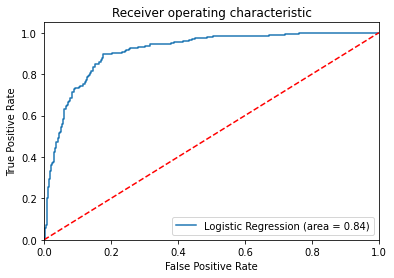

test set ROC:


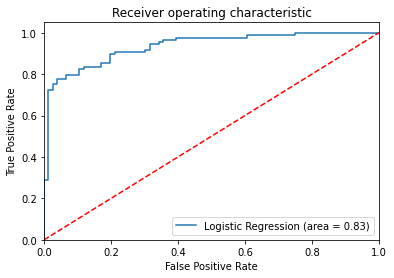

In [ ]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('train set ROC:')
plt.show()

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('test set ROC:')
plt.show()

### MLP (Perceptron)

train set ROC:


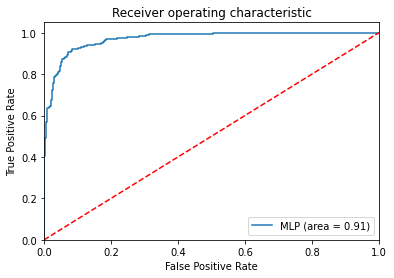

test set ROC:


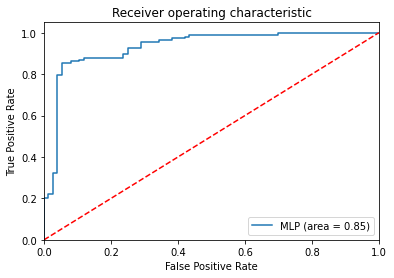

In [ ]:
logit_roc_auc = roc_auc_score(y_train, mlp.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, mlp.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('train set ROC:')
plt.show()

logit_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('test set ROC:')
plt.show()

### Decision Tree

train set ROC:


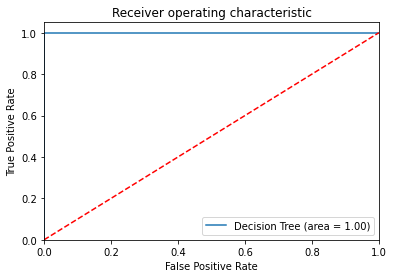

test set ROC:


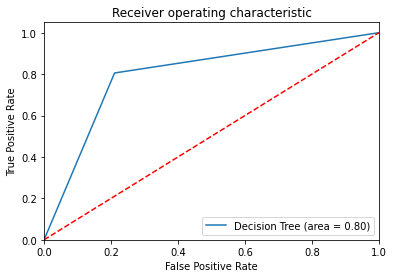

In [ ]:
logit_roc_auc = roc_auc_score(y_train, decision.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, decision.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('train set ROC:')
plt.show()

logit_roc_auc = roc_auc_score(y_test, decision.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, decision.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('test set ROC:')
plt.show()

### GaussianNB

train set ROC:


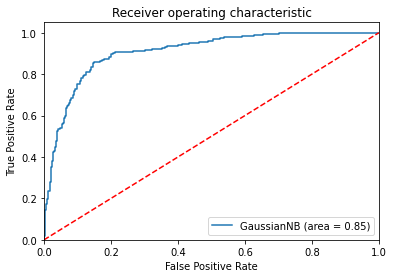

test set ROC:


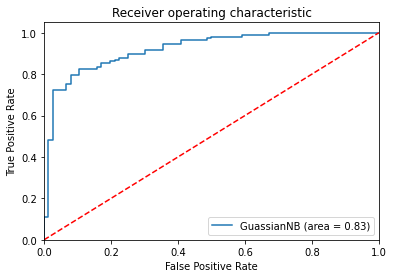

In [ ]:
logit_roc_auc = roc_auc_score(y_train, gaussian.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, gaussian.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GaussianNB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('train set ROC:')
plt.show()

logit_roc_auc = roc_auc_score(y_test, gaussian.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gaussian.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GuassianNB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('test set ROC:')
plt.show()

### KNeighborsClassifier

train set ROC:


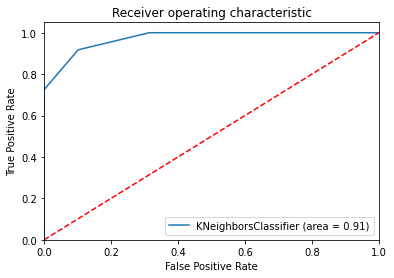

test set ROC:


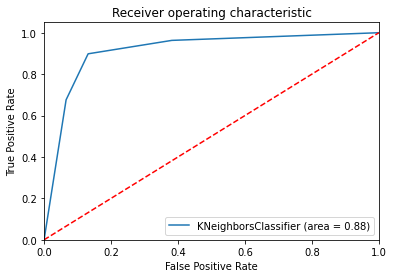

In [ ]:
logit_roc_auc = roc_auc_score(y_train, knn.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, knn.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighborsClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('train set ROC:')
plt.show()

logit_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighborsClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('test set ROC:')
plt.show()

### SVC

train set ROC:


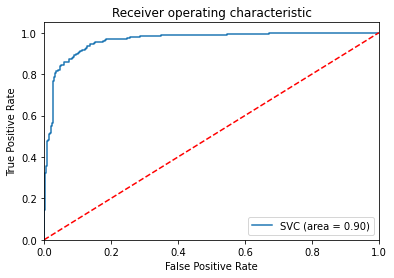

test set ROC:


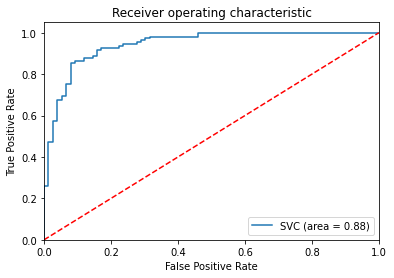

In [ ]:
logit_roc_auc = roc_auc_score(y_train, svc.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, svc.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('train set ROC:')
plt.show()

logit_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
print('test set ROC:')
plt.show()

Con respecto a la curva de los falsos positivos y Positivos reales, se puede observar que los mejores modelos para trabajar son SVC y KNeighborsClassifier ya que tienen una mayor area con lo que se relaciona con estos valores, dando como resultado una prediccion mas acertada.

Text(0.5, 1.0, 'Feature Importance')

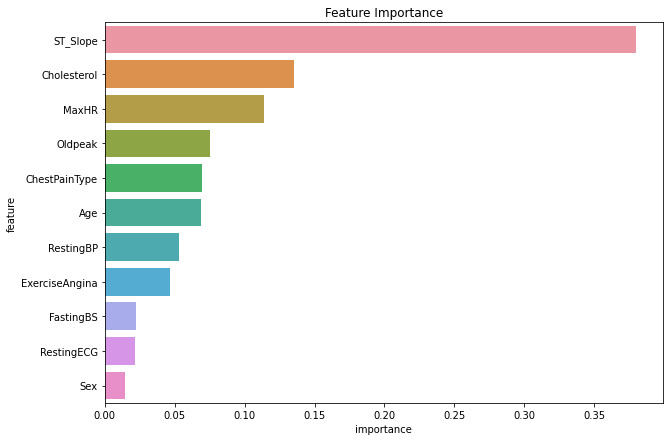

In [ ]:
tmp=pd.DataFrame({'feature':df.drop('HeartDisease',axis=1).columns,
                 'importance':decision.feature_importances_}).sort_values(by='importance',ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=tmp.importance ,y=tmp.feature).set_title('Feature Importance')

como se observa las variables con importancia son ST_Slope porque son las que tienen un mayor numero de datos con lo que respecta al HeartDisease

### Grafico del Arbol de decision

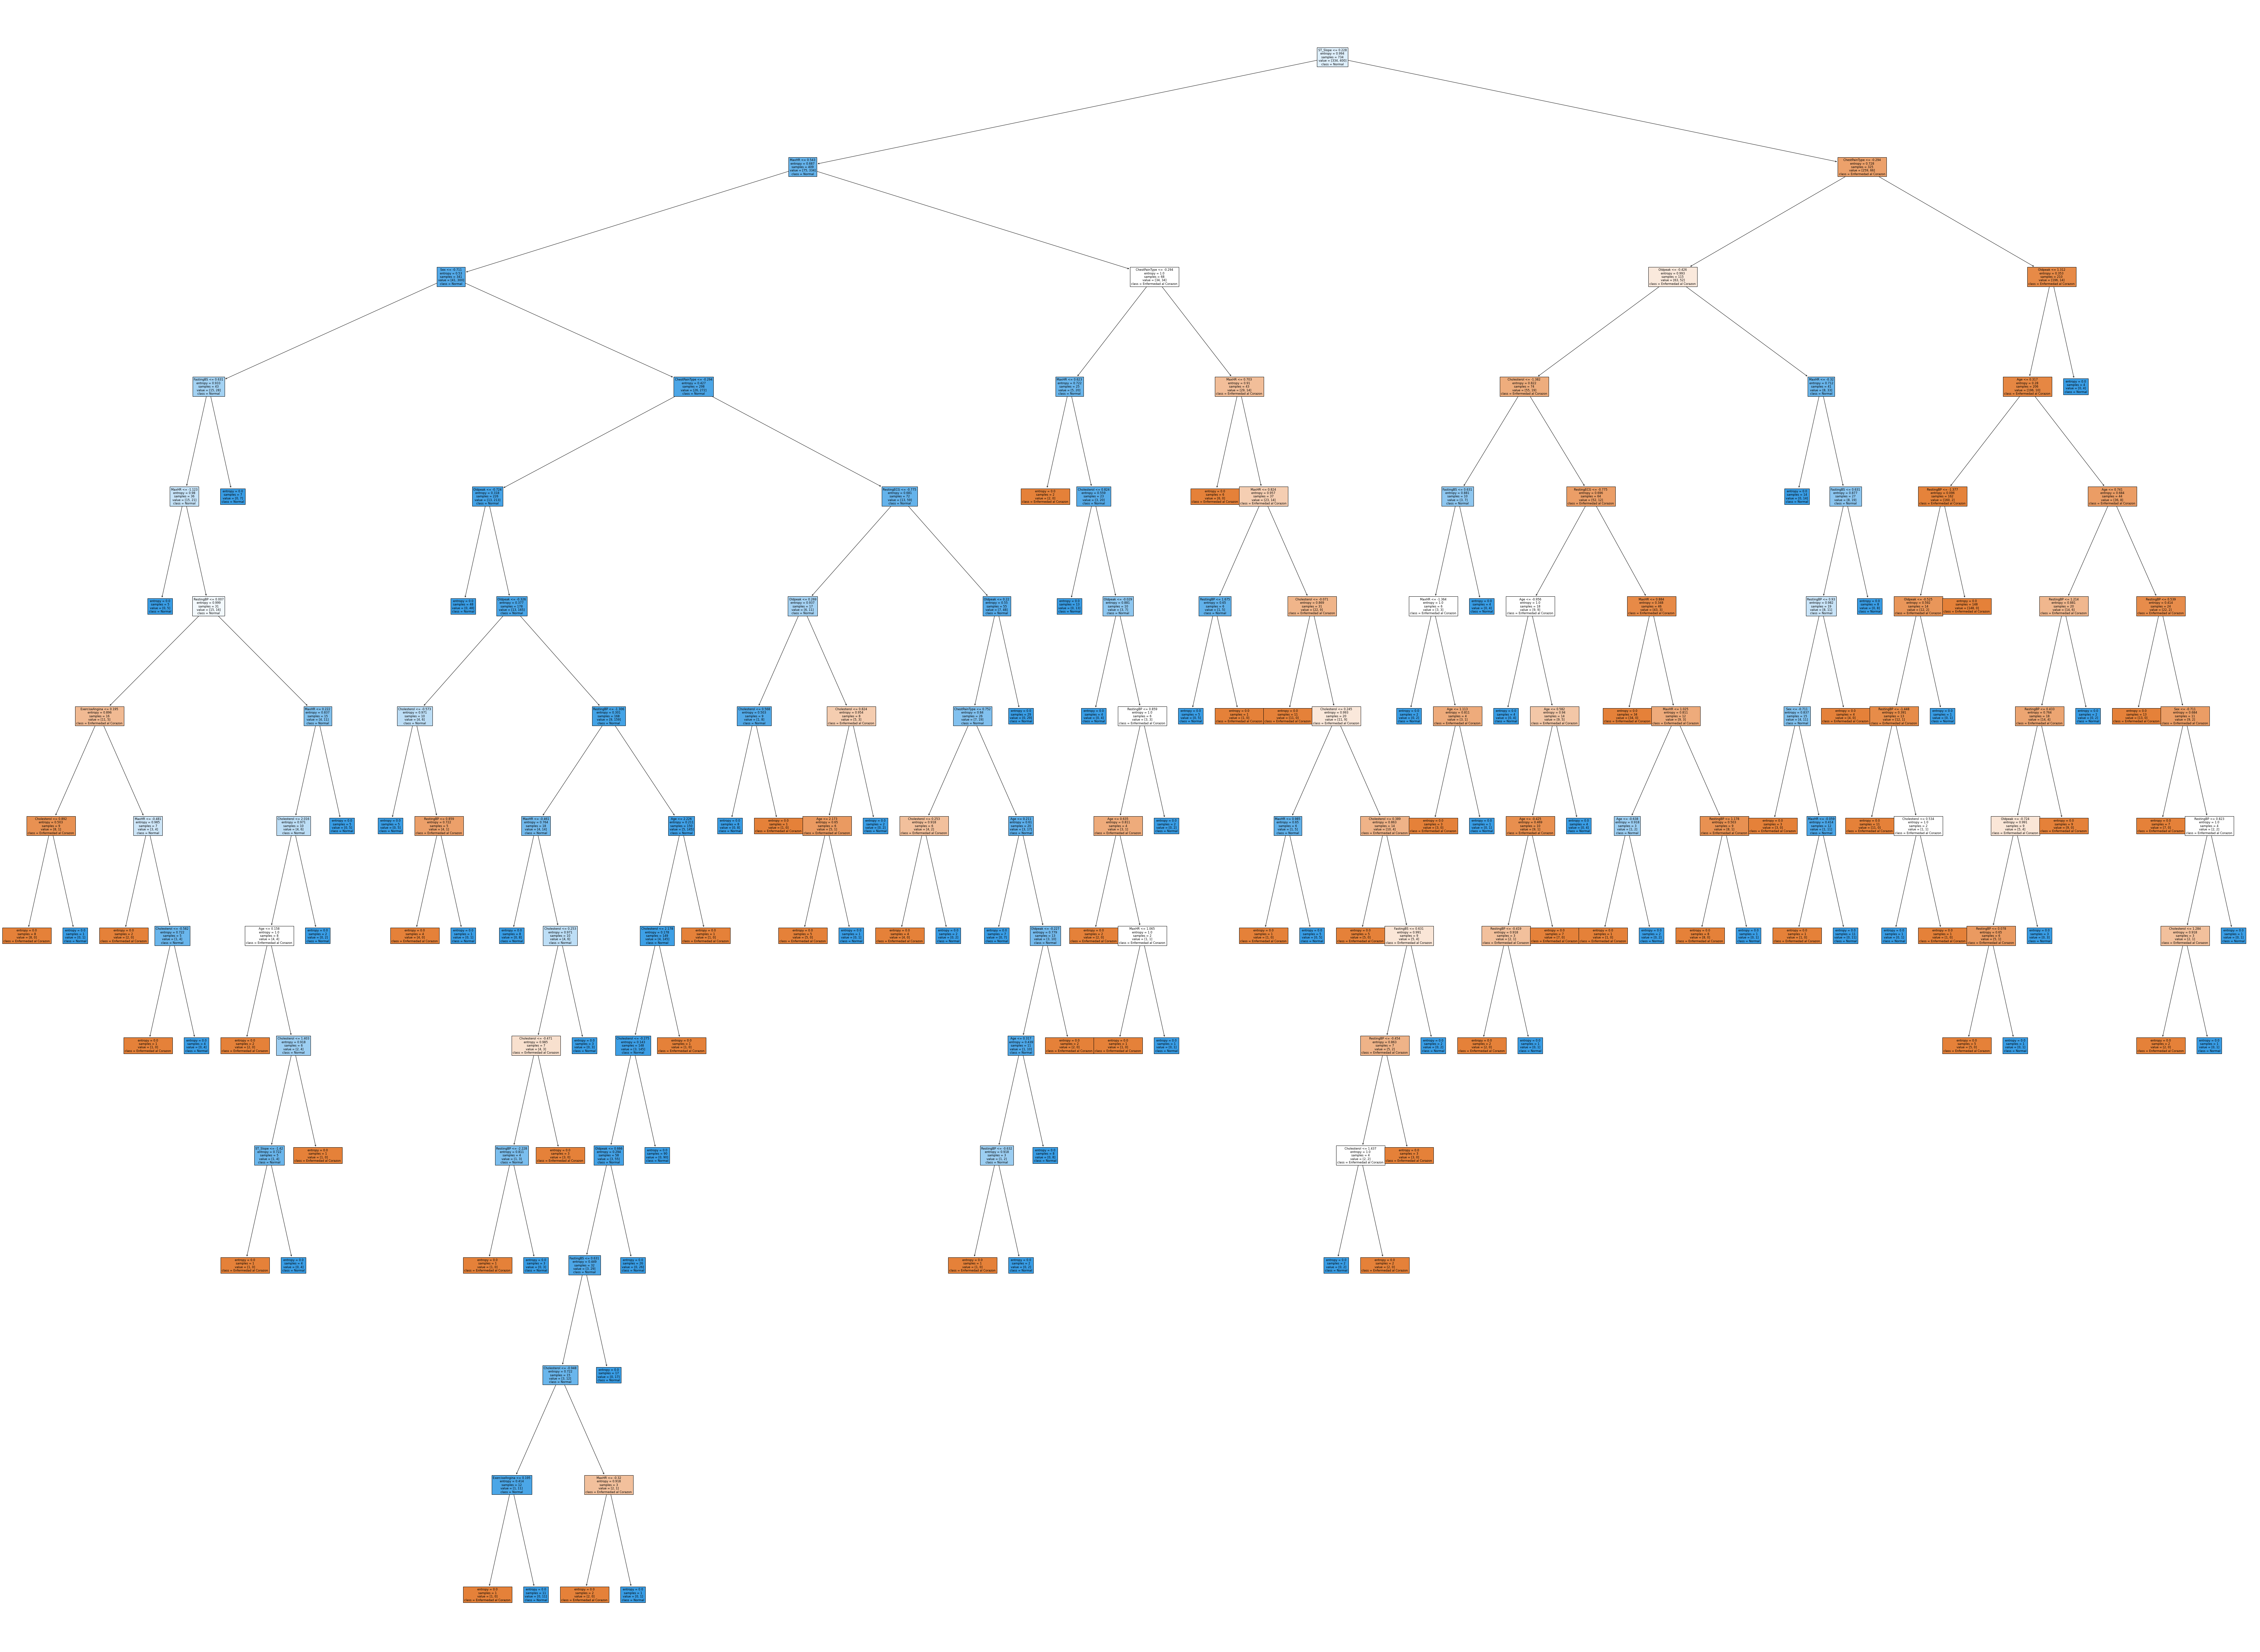

In [ ]:
plt.figure(figsize=(120, 90))
plot_tree(decision_tree=decision, feature_names=explicativas.columns, filled=True, class_names=['Enfermedad al Corazon', 'Normal']);

### predicciones con SVC

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
sample = X_test

print('Sample')

print(sample)

print('Data Predicted')

reverse_data = pd.DataFrame(std_scaler.inverse_transform(sample), columns = X_test.columns)
reverse_data['HeartDisease'] = svc.predict(sample)
reverse_data

Sample
          Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0    0.370100 -1.938163       2.321086  -0.134823     1.402799  -0.551341   
1   -1.114921  0.515952      -0.816995  -0.773532    -0.794411  -0.551341   
2   -1.433140  0.515952      -0.816995  -0.773532     2.271464   1.813758   
3   -1.114921  0.515952      -0.816995  -0.773532    -0.760346  -0.551341   
4    0.264027  0.515952       1.275059   1.781304    -1.390554  -0.551341   
..        ...       ...            ...        ...          ...        ...   
179 -0.796702 -1.938163       1.275059   0.716789    -0.760346  -0.551341   
180  0.582246  0.515952      -0.816995  -0.489661    -0.027942  -0.551341   
181 -1.220994  0.515952      -0.816995   0.929692    -1.390554  -0.551341   
182  0.157954  0.515952      -0.816995  -0.986435    -0.607052   1.813758   
183 -0.266338 -1.938163       1.275059  -0.773532     1.215440  -0.551341   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0   

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,29.0,0.0,3.0,31.0,164.0,0.0,1.0,25.0,0.0,20.0,1.0,1
1,15.0,1.0,0.0,22.0,35.0,0.0,1.0,46.0,1.0,20.0,1.0,1
2,12.0,1.0,0.0,22.0,215.0,1.0,1.0,78.0,1.0,20.0,1.0,1
3,15.0,1.0,0.0,22.0,37.0,0.0,0.0,46.0,1.0,35.0,1.0,1
4,28.0,1.0,2.0,58.0,0.0,0.0,0.0,49.0,1.0,35.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,18.0,0.0,2.0,43.0,37.0,0.0,0.0,86.0,1.0,24.0,0.0,0
180,31.0,1.0,0.0,26.0,80.0,0.0,1.0,61.0,1.0,35.0,0.0,1
181,14.0,1.0,0.0,46.0,0.0,0.0,1.0,26.0,1.0,10.0,1.0,1
182,27.0,1.0,0.0,19.0,46.0,1.0,2.0,28.0,0.0,10.0,1.0,1


In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


---

## Conclusiones

---

Al llevar a cabo estos experimentos en cada uno de los modelos identificados se puede observar una exactitud de predicción que no difiere de los 0.05%, lo cual quiere decir que son modelos prácticamente aceptables. Sin embargo, como se mencionó anteriormente para este problema dado, Support Vector Machines, es el que mejores resultados dio para predecir si el paciente es probable a sufrir una enfermedad en el corazón con respecto a los factores como su edad, colesterol, presión arterial en reposo tipo de dolor del pecho, azúcar en sangre en ayunas, agina inducida por ejercicio, entre otros factores.